In [1]:
# =======
# imports
# =======
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np

In [79]:
ssp_csv = pd.read_csv("C:\\Users\\dallalongaf\\OneDrive - TNO\\work\\2016 02 - TransRisk\\SSP\\SspDb_country_data_2013-06-12.csv")
def ssp_n(n):
    """Returns dataframe with sspn data"""
    return ssp_csv[ssp_csv['SCENARIO'].str.contains("SSP"+str(n))]

def ssp_nv(n,v):
    """Returns dataframe with sspn data, for variable v only"""
    return ssp_n(n)[ssp_n(n)['VARIABLE']==v]
def ssp_g(n):
    """Returns a dataframe with sspn GDP data, including all records from the hardcoded model"""
    
    # a mask to select OECD records:
    oeg_mask = ssp_nv(n,'GDP|PPP')['MODEL']=='IIASA GDP'
    
    # we apply the two mask, then append the resulting dataframes to one another and return: 
    return ssp_nv(n,'GDP|PPP')[oeg_mask]

In [82]:
afr = pd.read_excel("C:\\Users\\dallalongaf\\OneDrive - TNO\\work\\2016 02 - TransRisk\\4 - energy access\\between ETH and AFR\\cost boundary_NEW.xlsx",sheet_name='african countries')
afr.columns=['REGION']
afr.head()

,REGION
0,MAR
1,CAF
2,CMR
3,COG
4,GAB


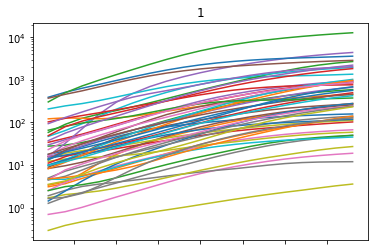

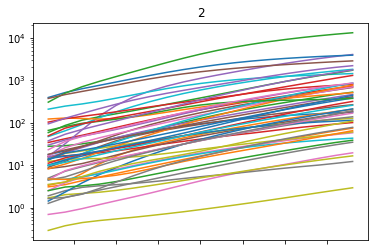

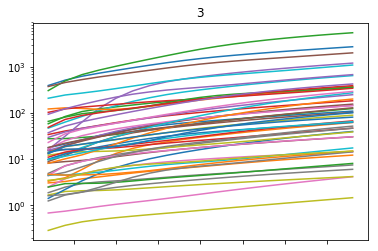

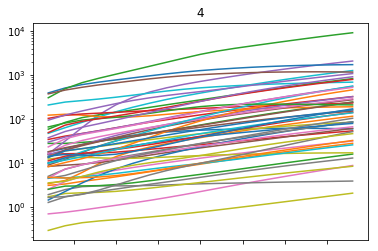

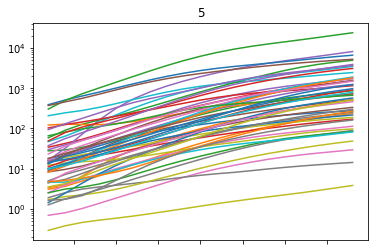

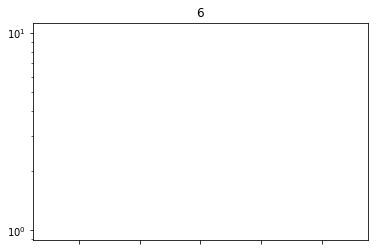

In [135]:
axes = []
for n in range(1,7):
    df = ssp_g(n).merge(afr,on='REGION',how='right')
    df = df.set_index('REGION')
    df  =df.drop([c for c in df.columns if not c.isnumeric()],axis=1)
    df = df.drop([c for c in df.columns if int(c) < 2005],axis=1)
    df = df.drop([c for c in df.columns if int(c) > 2100],axis=1)
    ax = df.transpose().plot(legend=False,logy=True)
    #ax.set_ylim(0,5000)
    ax.set_title(n)
    axes.append(ax)